Carga del Archivo .txt


Esta parte se hizo como experimento para probar que se guardo en los .txt

In [106]:
import pandas as pd

In [107]:
db=pd.read_csv("SEÑALES EMG/SUJETO1/M1_JUAN_VANEGAS.txt", delimiter="\t",encoding="latin1", skiprows=4,on_bad_lines="skip")

In [108]:
db.isna().sum()

ChannelTitle=      0
Biceps           278
Triceps          209
dtype: int64

In [109]:
db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68384 entries, 0 to 68383
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   ChannelTitle=  68384 non-null  object
 1   Biceps         68106 non-null  object
 2   Triceps        68175 non-null  object
dtypes: object(3)
memory usage: 1.6+ MB


In [110]:
db

,ChannelTitle=,Biceps,Triceps
0,Range=,"1000,0 µV","1000,0 µV"
1,0,"-0,3","-2,0"
2,"0,0005","-4,6","-26,5"
3,"0,001","-19,1","-103,4"
4,"0,0015","-47,8","-241,2"
...,...,...,...
68379,"34,192","-225,6","-802,9"
68380,"34,1925","-234,3","-805,4"
68381,"34,193","-233,1","-776,5"
68382,"34,1935","-223,9","-722,6"


In [ ]:
import pandas as pd

# Cargar el archivo completo como lista de líneas
with open("SEÑALES EMG/SUJETO1/M1_JUAN_VANEGAS.txt", encoding="latin1") as f:
    lines = f.readlines()

# Inicializar variables
segments = []
current_segment = []
recording = False

for line in lines:
    if "FIN CONTRACCION" in line:
        recording = True
        current_segment = []  # Inicia nuevo segmento
    elif "FIN RELAJACION" in line:
        recording = False
        segments.append(current_segment)  # Guarda segmento
    elif recording:
        current_segment.append(line)

# Convertir cada segmento a DataFrame
dataframes = []
for segment in segments:
    from io import StringIO
    df = pd.read_csv(StringIO("".join(segment)), sep=",", encoding="latin1")
    dataframes.append(df)

# Ejemplo: visualizar el primer segmento

dataframes

[]

Carga del Archivo en .mat

Inicia la exploración de información guardada en los .mat 

In [2]:
from scipy.io import loadmat

mat_data = loadmat("SEÑALES EMG/SUJETO1/M1_JUAN_VANEGAS.mat")


In [3]:
print(len(mat_data))
print(mat_data.keys())



14
dict_keys(['data', 'datastart', 'dataend', 'titles', 'rangemin', 'rangemax', 'unittext', 'unittextmap', 'blocktimes', 'tickrate', 'samplerate', 'firstsampleoffset', 'comtext', 'com'])


In [5]:
print(mat_data['samplerate'])

[[   0.]
 [   0.]
 [2000.]
 [2000.]]


In [114]:
print(mat_data)

{'data': array([[-3.1249999e-07, -4.5625002e-06, -1.9125000e-05, ...,
        -7.7646878e-04, -7.2259374e-04, -6.4656249e-04]],
      shape=(1, 136778), dtype=float32), 'datastart': array([[-1.000e+00],
       [-1.000e+00],
       [ 1.000e+00],
       [ 6.839e+04]]), 'dataend': array([[-1.00000e+00],
       [-1.00000e+00],
       [ 6.83890e+04],
       [ 1.36778e+05]]), 'titles': array(['Int. Bi', 'Int. Tr', 'Biceps ', 'Triceps'], dtype='<U7'), 'rangemin': array([[ 0.],
       [ 0.],
       [-1.],
       [-1.]]), 'rangemax': array([[0.],
       [0.],
       [1.],
       [1.]]), 'unittext': array(['V'], dtype='<U1'), 'unittextmap': array([[-1.],
       [-1.],
       [ 1.],
       [ 1.]]), 'blocktimes': array([[739862.49936704]]), 'tickrate': array([[2000.]]), 'samplerate': array([[   0.],
       [   0.],
       [2000.],
       [2000.]]), 'firstsampleoffset': array([[0.],
       [0.],
       [0.],
       [0.]]), 'comtext': array(['FIN RELAJACIÓN ', 'FIN CONTRACCIÓN'], dtype='<U15'), 'com

In [115]:
print(len(mat_data["data"][0]))


136778


In [116]:
print(mat_data["titles"])

['Int. Bi' 'Int. Tr' 'Biceps ' 'Triceps']


In [117]:
mat_data["com"]

array([[-1.00e+00,  1.00e+00,  9.98e+03,  1.00e+00,  1.00e+00],
       [-1.00e+00,  1.00e+00,  2.00e+04,  1.00e+00,  2.00e+00],
       [-1.00e+00,  1.00e+00,  3.00e+04,  1.00e+00,  1.00e+00],
       [-1.00e+00,  1.00e+00,  4.00e+04,  1.00e+00,  2.00e+00],
       [-1.00e+00,  1.00e+00,  5.00e+04,  1.00e+00,  1.00e+00],
       [-1.00e+00,  1.00e+00,  6.00e+04,  1.00e+00,  2.00e+00]])

In [118]:
print((mat_data["data"][0]))
dcom=mat_data["data"][0]

[-3.1249999e-07 -4.5625002e-06 -1.9125000e-05 ... -7.7646878e-04
 -7.2259374e-04 -6.4656249e-04]


In [119]:
print(mat_data["dataend"])
eti=mat_data["dataend"][2]
eti

[[-1.00000e+00]
 [-1.00000e+00]
 [ 6.83890e+04]
 [ 1.36778e+05]]


array([68389.])

In [120]:
mat_data["dataend"]

array([[-1.00000e+00],
       [-1.00000e+00],
       [ 6.83890e+04],
       [ 1.36778e+05]])

In [121]:
biceps=dcom[:int(eti)]
biceps


C:\Users\Windows 10\AppData\Local\Temp\ipykernel_8668\2719320068.py:1: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  biceps=dcom[:int(eti)]


array([-3.1249999e-07, -4.5625002e-06, -1.9125000e-05, ...,
       -2.3312500e-04, -2.2387500e-04, -2.0746875e-04],
      shape=(68389,), dtype=float32)

La extracción se debe automatizar, cosa que logro Leon con la misma idea que desarrolle acá

**Prueba de Graficación de la Señal**

Se crea un vector de tiempo primero 

In [122]:
import matplotlib.pyplot as plt
import numpy as np

fs = 2000          # frecuencia de muestreo
N = 68389          # número de muestras
Ts = 1 / fs        # periodo de muestreo

t = np.arange(N) * Ts  # vector de tiempo


<function matplotlib.pyplot.show(close=None, block=None)>

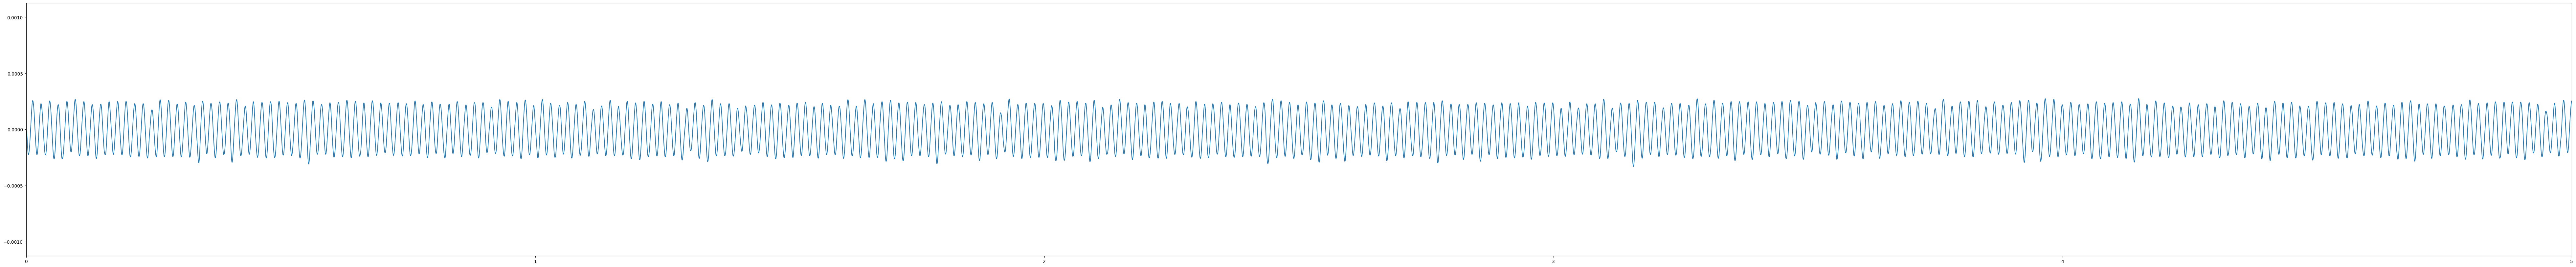

In [123]:
plt.figure(figsize=(100,10))
plt.subplot()
plt.xlim(0,5)
plt.plot(t,biceps)
plt.show


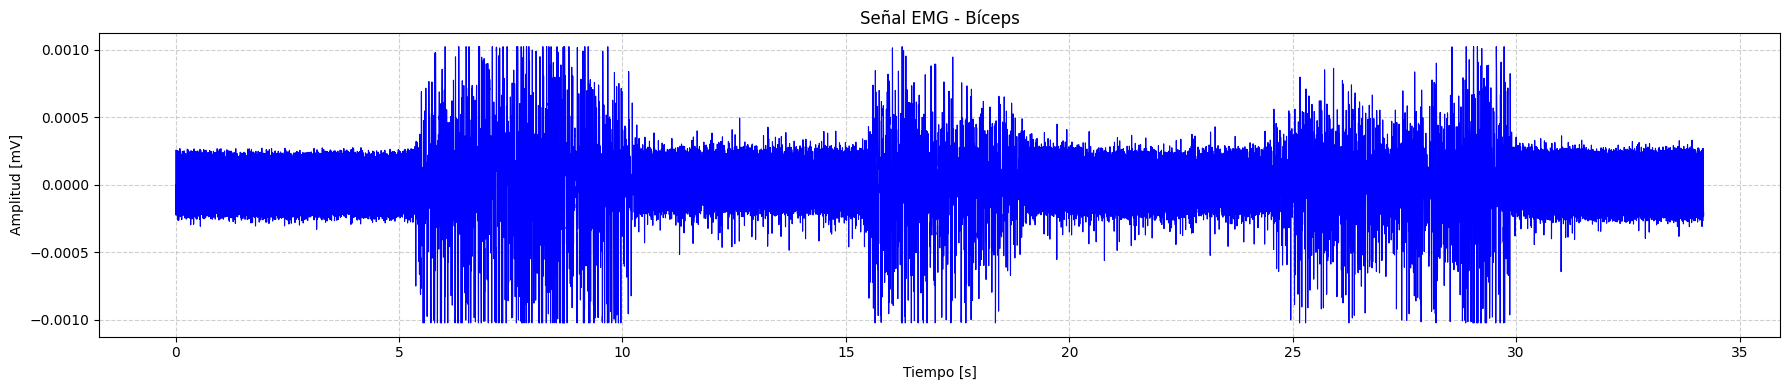

In [124]:
plt.figure(figsize=(18, 4))  # más ancho en X, más corto en Y
plt.plot(t, biceps, color="blue", linewidth=0.8)
plt.title("Señal EMG - Bíceps")
plt.xlabel("Tiempo [s]")
plt.ylabel("Amplitud [mV]")
plt.grid(True, linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()

In [125]:
triceps=dcom[int(eti):]
triceps

C:\Users\Windows 10\AppData\Local\Temp\ipykernel_8668\4106033486.py:1: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  triceps=dcom[int(eti):]


array([-1.9687500e-06, -2.6500000e-05, -1.0340625e-04, ...,
       -7.7646878e-04, -7.2259374e-04, -6.4656249e-04],
      shape=(68389,), dtype=float32)

<function matplotlib.pyplot.show(close=None, block=None)>

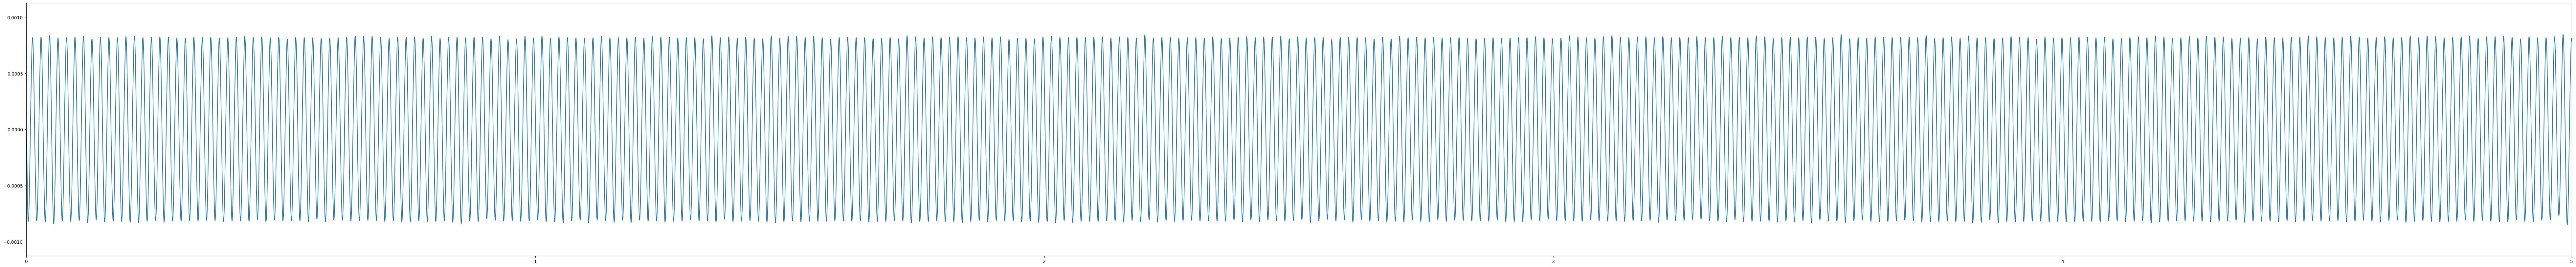

In [126]:
plt.figure(figsize=(100,10))
plt.subplot()
plt.xlim(0,5)
plt.plot(t,triceps)
plt.show

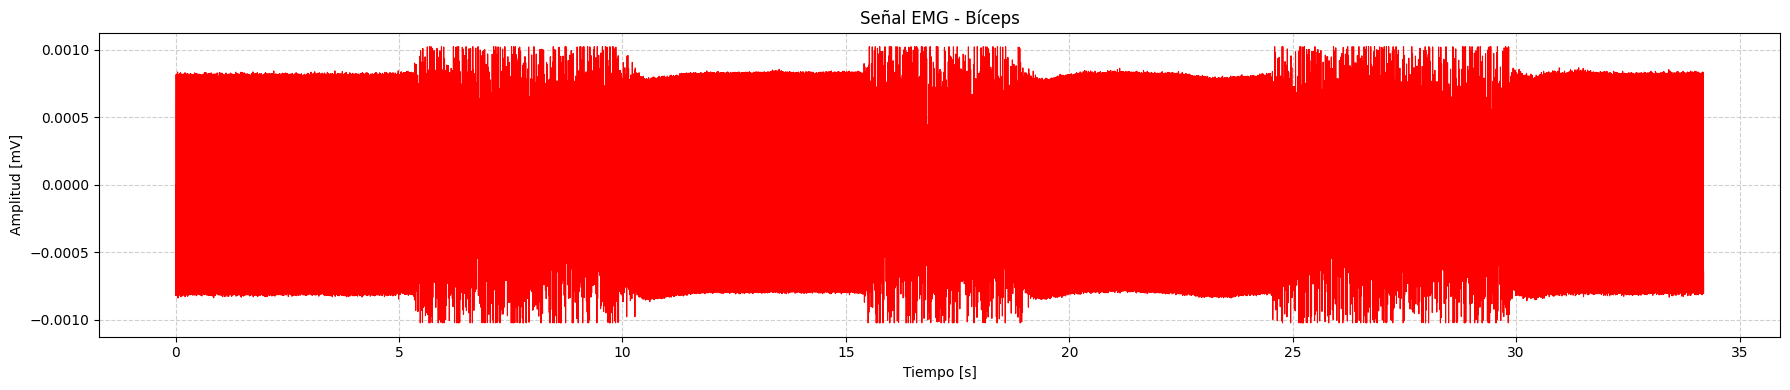

In [127]:
plt.figure(figsize=(18, 4))  # más ancho en X, más corto en Y
plt.plot(t, triceps, color="red", linewidth=0.8)
plt.title("Señal EMG - Bíceps")
plt.xlabel("Tiempo [s]")
plt.ylabel("Amplitud [mV]")
plt.grid(True, linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()

In [128]:
type(t)

numpy.ndarray

In [129]:
dt=[t,biceps,triceps]
cua=pd.DataFrame(data=dt,index=["tiempo","biceps","triceps"])
db=cua.T

Con la extración de los datos de biceps y Triceps armo un dataset 

In [130]:
db

,tiempo,biceps,triceps
0,0.0000,-3.125000e-07,-0.000002
1,0.0005,-4.562500e-06,-0.000026
2,0.0010,-1.912500e-05,-0.000103
3,0.0015,-4.781250e-05,-0.000241
4,0.0020,-8.790625e-05,-0.000414
...,...,...,...
68384,34.1920,-2.255937e-04,-0.000803
68385,34.1925,-2.342500e-04,-0.000805
68386,34.1930,-2.331250e-04,-0.000776
68387,34.1935,-2.238750e-04,-0.000723


In [131]:
db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68389 entries, 0 to 68388
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   tiempo   68389 non-null  float64
 1   biceps   68389 non-null  float64
 2   triceps  68389 non-null  float64
dtypes: float64(3)
memory usage: 1.6 MB


**Prueba de Filtrado de Señales**

Con un codigo usado en Señales y sistemas para Filtrado de Señales Fisiologicas hago la prueba

In [132]:
import numpy as np # Librería para manejo de vectores y matrices
import matplotlib.pyplot as plt # Librería para graficar
from scipy.signal import butter, filtfilt # Librería para filtrar las señales
from scipy.fft import fft, fftfreq # Librería para la transformada de Fourier


In [133]:
def butter_filter(data, lowcut=None, highcut=None, fs=1000, btype='low', order=4):
    nyq = 0.5 * fs
    if btype == 'low':
        normal_cutoff = highcut / nyq # Se hallan las frecuencias de corte
        b, a = butter(order, normal_cutoff, btype='low') # Se estiman los coeficientes para del filtro para aplicarlos a la señal
    elif btype == 'high':
        normal_cutoff = lowcut / nyq # Se hallan las frecuencias de corte
        b, a = butter(order, normal_cutoff, btype='high')# Se estiman los coeficientes para del filtro para aplicarlos a la señal
    elif btype == 'band':
        low = lowcut / nyq # Se hallan las frecuencias de corte
        high = highcut / nyq # Se hallan las frecuencias de corte
        b, a = butter(order, [low, high], btype='band')# Se estiman los coeficientes para del filtro para aplicarlos a la señal
    elif btype == 'bandstop':
        low = lowcut / nyq # Se hallan las frecuencias de corte
        high = highcut / nyq # Se hallan las frecuencias de corte
        b, a = butter(order, [low, high], btype='bandstop')# Se estiman los coeficientes para del filtro para aplicarlos a la señal
    else:
        raise ValueError("Tipo de filtro no válido")
    return filtfilt(b, a, data)

In [134]:
def plot_fft(signal, fs):
    N = len(signal)
    yf = fft(signal)
    xf = fftfreq(N, 1/fs)

    magnitude = 2.0 / N * np.abs(yf[:N//2]) # su transformada tiene simetría conjugada: la segunda mitad de yf es redundante.
    #El factor 2.0 / N es una normalización para que la amplitud refleje correctamente la escala de la señal original.
    #// es el operador de división entera.

    plt.plot(xf[:N//2], magnitude)
    plt.title("Espectro de Frecuencia (FFT) - Amplitud Real")
    plt.xlabel("Frecuencia [Hz]")
    plt.ylabel("Amplitud")
    #plt.xlim([0,120])
    plt.grid()


In [135]:
biceps_filt = butter_filter(biceps, lowcut=20, highcut=500, fs=2000, btype='band')
biceps_filt = butter_filter(biceps, lowcut=58, highcut=62, fs=2000, btype='bandstop')

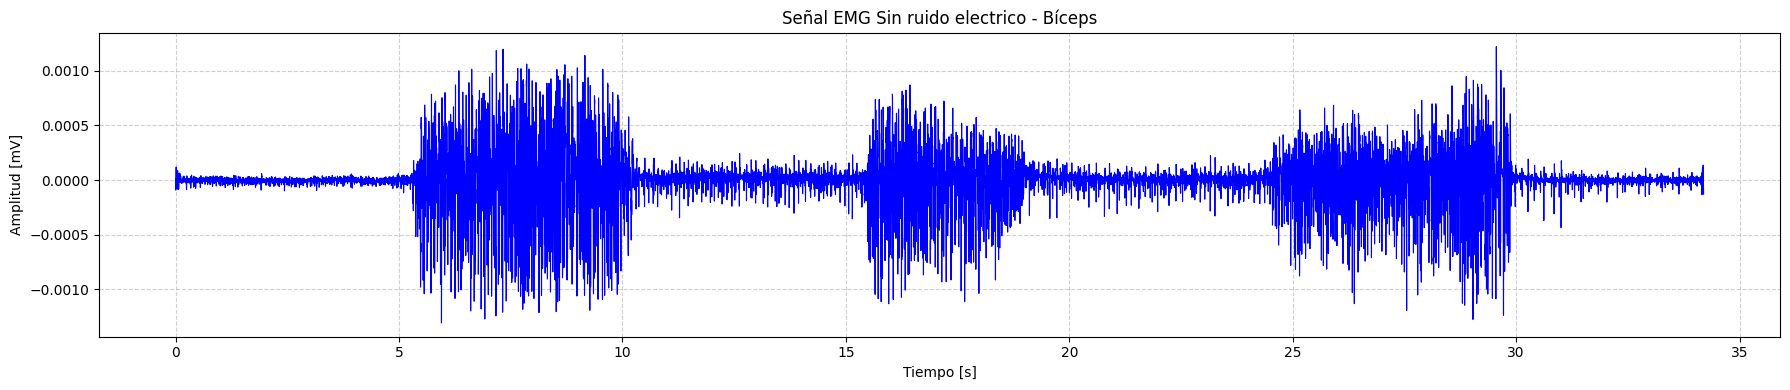

In [136]:
plt.figure(figsize=(18, 4))  # más ancho en X, más corto en Y
plt.plot(t, biceps_filt, color="b", linewidth=0.8)
plt.title("Señal EMG Sin ruido electrico - Bíceps")
plt.xlabel("Tiempo [s]")
plt.ylabel("Amplitud [mV]")
plt.grid(True, linestyle="--", alpha=0.6)
plt.tight_layout()
#plt.xlim(5,15)
plt.show()

In [137]:
triceps_filt = butter_filter(triceps, lowcut=20, highcut=500, fs=2000, btype='band')
triceps_filt = butter_filter(triceps, lowcut=58, highcut=62, fs=2000, btype='bandstop')

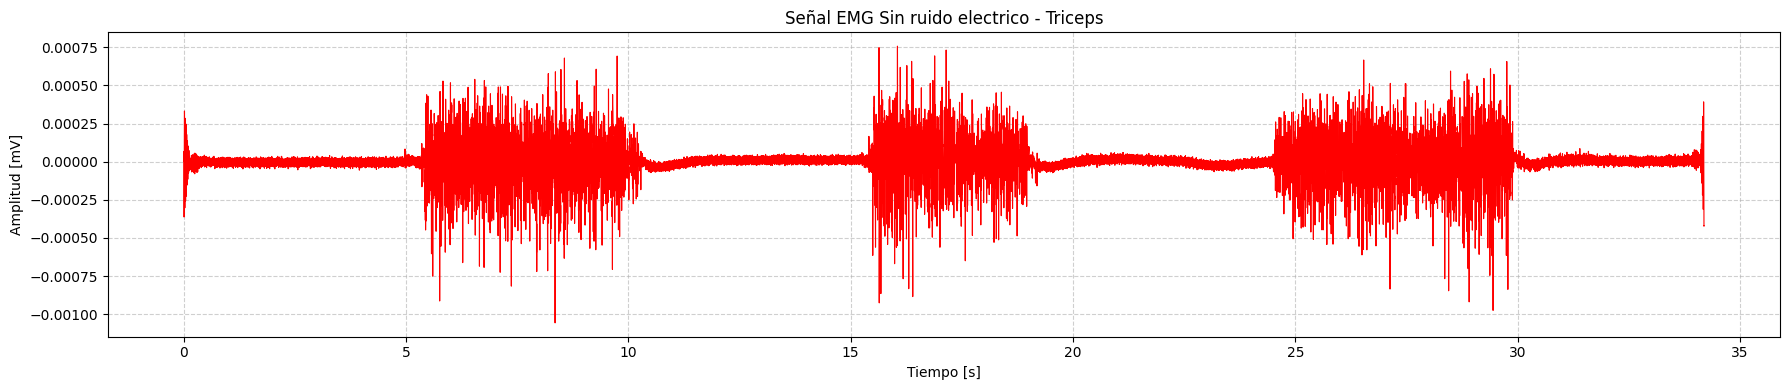

In [138]:
plt.figure(figsize=(18, 4))  # más ancho en X, más corto en Y
plt.plot(t, triceps_filt, color="red", linewidth=0.8)
plt.title("Señal EMG Sin ruido electrico - Triceps")
plt.xlabel("Tiempo [s]")
plt.ylabel("Amplitud [mV]")
plt.grid(True, linestyle="--", alpha=0.6)
plt.tight_layout()
#plt.xlim(5,15)
plt.show()